In [376]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import seaborn as sns

## India Story

In [203]:
#Temperatures
fil1 = pd.read_csv("C:/Users/Surabhi/Desktop/IIITD/7th SEM/DSc/Assignments/Assignment1/datafile.csv")
d1 = dict(zip(fil1['YEAR'], (fil1['JAN-FEB - MIN'] + fil1['JAN-FEB - MAX'] + fil1['OCT-DEC - MIN'] + fil1['OCT-DEC - MAX'])/4)) #Winter
d2 = dict(zip(fil1['YEAR'], (fil1['MAR-MAY - MIN'] + fil1['MAR-MAY - MAX'])/2)) #Spring
d3 = dict(zip(fil1['YEAR'], (fil1['JUN-SEP - MIN'] + fil1['JUN-SEP - MAX'])/2)) #Summer

d4 = dict(zip((fil1['JAN-FEB - MIN'] + fil1['JAN-FEB - MAX'] + fil1['OCT-DEC - MIN'] + fil1['OCT-DEC - MAX'])/4, fil1['YEAR'])) #Winter
d5 = dict(zip((fil1['MAR-MAY - MIN'] + fil1['MAR-MAY - MAX'])/2, fil1['YEAR'])) #Spring
d6 = dict(zip((fil1['JUN-SEP - MIN'] + fil1['JUN-SEP - MAX'])/2, fil1['YEAR'])) #Summer

In [204]:
data1 = np.array(fil1)
years = data1[:, 0]
num_years = len(years)
annual_min = data1[:, 1]
annual_max = data1[:, 2]
average = (annual_min + annual_max)/2

winter_avg = (data1[:, 3] + data1[:, 4] + data1[:, 9] + data1[:, 10])/4
spring_avg = (data1[:, 5] + data1[:, 6])/2
summer_avg = (data1[:, 7] + data1[:, 8])/2

Text(0,0.5,'Average Temperature')

[[334.8    0.    54.  ]
 [  0.   217.44  36.  ]
 [  0.     0.     1.  ]]
[[ 7.83699060e-03  0.00000000e+00 -1.48526646e+01]
 [ 0.00000000e+00  3.14564328e-01 -7.36725385e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[334.8    0.    54.  ]
 [  0.   217.44  36.  ]
 [  0.     0.     1.  ]]
[[334.8     0.     50.575]
 [  0.    217.44   38.2  ]
 [  0.      0.      1.   ]]


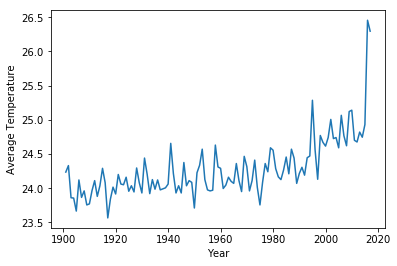

In [205]:
plt.plot(years, average)
plt.xlabel("Year")
plt.ylabel("Average Temperature")

Text(0,0.5,'Frequency of outliers')

[[334.8    0.    54.  ]
 [  0.   217.44  36.  ]
 [  0.     0.     1.  ]]
[[ 0.09717701  0.         -1.84998299]
 [ 0.          0.33333333 -0.16666667]
 [ 0.          0.          1.        ]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[334.8    0.    54.  ]
 [  0.   217.44  36.  ]
 [  0.     0.     1.  ]]
[[ 8.41750842e-03  0.00000000e+00 -1.60235690e+01]
 [ 0.00000000e+00  1.05820106e-01 -0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[334.8    0.    54.  ]
 [  0.   217.44  36.  ]
 [  0.     0.     1.  ]]
[[334.8    0.   145.95]
 [  0.   217.44  24.2 ]
 [  0.     0.     1.  ]]


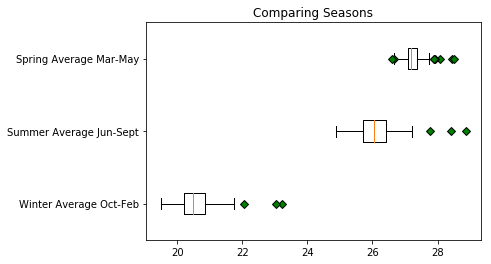

[[334.8    0.    54.  ]
 [  0.   217.44  36.  ]
 [  0.     0.     1.  ]]
[[334.8     0.     34.575]
 [  0.    217.44   38.2  ]
 [  0.      0.      1.   ]]


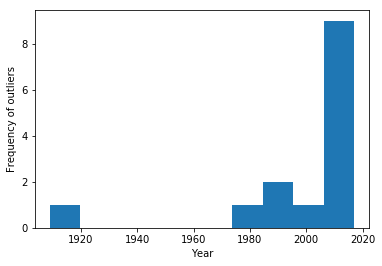

In [347]:
#Compare seasons
green_diamond = dict(markerfacecolor='g', marker='D')
ret = plt.boxplot([winter_avg, spring_avg, summer_avg], labels=["Winter Average Oct-Feb", "Summer Average Jun-Sept", "Spring Average Mar-May"], flierprops=green_diamond, vert=False)
plt.title("Comparing Seasons")

outlier_years = []
years_winter = []
for x in ret['fliers'][0].get_xdata(): 
    years_winter.append(d4[x])
    outlier_years.append(d4[x])
# print(years_winter)

years_spring = []
for x in ret['fliers'][1].get_xdata(): 
    years_spring.append(d5[x])
    outlier_years.append(d5[x])
# print(years_spring)

years_summer = []
for x in ret['fliers'][2].get_xdata(): 
    years_summer.append(d6[x])
    outlier_years.append(d6[x])
# print(years_summer)

plt.figure()
plt.hist(outlier_years)
plt.xlabel("Year")
plt.ylabel("Frequency of outliers")

In [207]:
#Deforestation
fil2 = pd.read_csv("C:/Users/Surabhi/Desktop/IIITD/7th SEM/DSc/Assignments/Assignment1/datafile_deforestation.csv")

0.31504730702247535
[[334.8    0.    54.  ]
 [  0.   217.44  36.  ]
 [  0.     0.     1.  ]]
[[ 0.00277778  0.         -0.        ]
 [ 0.          0.01878045 -0.        ]
 [ 0.          0.          1.        ]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[0 3 0 0 3 2 3 3 0 0 3 2 2 3 0 3 3 3 0 2 3 0 0 0 0 3 0 1 3 3 0 3 3 3 3 0]
[0.3825704538712548 0.9333836643336767 0.28611343408398543
 0.1400960683152464 0.8185477462666119 4.12590909090909 1.537872612382307
 1.335893719806763 0.1975 0.21984374999999998 0.9265769403319876
 4.455623094124823 4.571819899244332 0.8566708609271523
 0.028245342283034294 0.9406844138750903 1.2261267643142477
 2.0060838541410364 0.0 3.2256232722763323 1.215730239532773
 0.18466332295630117 0.04506998716901901 0.342982514021775 0.0
 0.9773648846041485 0.017777777777777774 37.4919052803484
 1.6963963311609944 0.8268181818181819 0.09841216087667898
 1.3488687007199176 1.0237354387781517 1.332286940527284
 1.7795192426425188 0.26835104172849766]
[1 0 1 1 0 2 0 0 1 1 0 2 

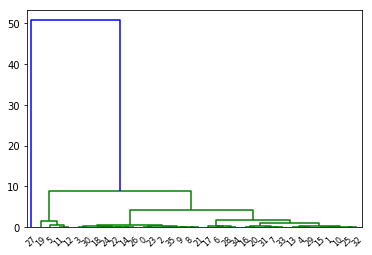

<Figure size 432x288 with 0 Axes>

In [357]:
data_def = np.array(fil2)
states = data_def[:, 1]
diverted = data_def[:, 3]
totalarea = data_def[:, 6]
totalforest = data_def[:, 8]
ratio1 = diverted/totalforest*100
ratio2 = diverted/totalarea*100

avg = sum(ratio2)/len(ratio2)
print(avg)
dendrogram = sch.dendrogram(sch.linkage(ratio1.reshape(len(ratio1),1), method='ward'))

kmeans = KMeans(n_clusters=4, random_state=0).fit(ratio1.reshape(len(ratio1),1))
plt.figure()

model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
model.fit(ratio1.reshape(len(ratio1),1))
labels = np.array(model.labels_)
print(kmeans.labels_)
print(ratio1)
#print(states[labels==3])
print(labels)

In [129]:
#Rainfall
fil3 = pd.read_csv("C:/Users/Surabhi/Desktop/IIITD/7th SEM/DSc/Assignments/Assignment1/datafile2.csv")

[[334.8    0.    54.  ]
 [  0.   217.44  36.  ]
 [  0.     0.     1.  ]]
[[ 7.50750751e-05  0.00000000e+00 -0.00000000e+00]
 [ 0.00000000e+00  1.24967186e-04 -0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[334.8    0.    54.  ]
 [  0.   217.44  36.  ]
 [  0.     0.     1.  ]]
[[334.8     0.     39.325]
 [  0.    217.44   27.075]
 [  0.      0.      1.   ]]


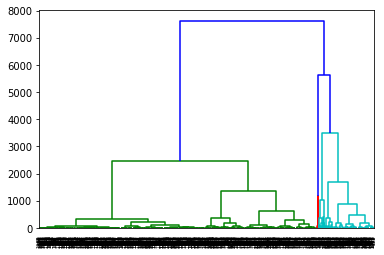

In [336]:
cities = fil3['Station Name'].unique()
rainfall = np.array(fil3["Mean Rainfall in mm"])
rainfall = rainfall.reshape(len(rainfall),1)
dendrogram = sch.dendrogram(sch.linkage(rainfall, method='ward'))

#kmeans = KMeans(n_clusters=3, random_state=0).fit(rainfall.reshape(len(rainfall),1))

In [182]:
#Correlate factors
fil4 = pd.read_csv("C:/Users/Surabhi/Desktop/IIITD/7th SEM/DSc/Assignments/Assignment1/temp_pressure_wind_humidity.csv")

c:\users\surabhi\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


[[ 83.7    0.   137.7 ]
 [  0.    81.54 298.62]
 [  0.     0.     1.  ]]
[[ 1.  0. -0.]
 [ 0.  1. -0.]
 [ 0.  0.  1.]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[ 83.7    0.   221.4 ]
 [  0.    81.54 298.62]
 [  0.     0.     1.  ]]
[[ 1.  0. -0.]
 [ 0.  1. -0.]
 [ 0.  0.  1.]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[ 83.7    0.   305.1 ]
 [  0.    81.54 298.62]
 [  0.     0.     1.  ]]
[[ 1.  0. -0.]
 [ 0.  1. -0.]
 [ 0.  0.  1.]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[ 83.7    0.    54.  ]
 [  0.    81.54 217.08]
 [  0.     0.     1.  ]]
[[ 1.  0. -0.]
 [ 0.  1. -0.]
 [ 0.  0.  1.]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[ 83.7    0.   221.4 ]
 [  0.    81.54 217.08]
 [  0.     0.     1.  ]]
[[ 1.  0. -0.]
 [ 0.  1. -0.]
 [ 0.  0.  1.]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[ 83.7    0.   305.1 ]
 [  0.    81.54 217.08]
 [  0.     0.     1.  ]]
[[ 1.  0. -0.]
 [ 0.  1. -0.]
 [ 0.  0.  1.]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[ 83.7    0.    54.  ]
 [  0.    81.54 135.54]
 [  0.     0.   

[[ 83.7    0.    54.  ]
 [  0.    81.54 298.62]
 [  0.     0.     1.  ]]
[[ 4.46498337e-02  0.00000000e+00 -4.05177930e+01]
 [ 0.00000000e+00  3.66300366e-03 -0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[ 4.46498337e-02  0.00000000e+00 -4.05177930e+01]
 [ 0.00000000e+00  1.53229229e-02 -5.39338540e-01]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
[[ 4.46498337e-02  0.00000000e+00 -4.05177930e+01]
 [ 0.00000000e+00  4.16586766e-02 -5.07874383e-03]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
[[ 4.46498337e-02  0.00000000e+00 -4.05177930e+01]
 [ 0.00000000e+00  1.10063672e-02 -4.32192523e-02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
[[ 0.01532292  0.         -0.53933854]
 [ 0.          0.01100637 -0.04321925]
 [ 0.          0.          1.        ]]
[[ 0.04165868  0.         -0.00507874]
 [ 0.          0.01100637 -0.04321925]
 [ 0.          0.          1.        ]]
[[ 83.7    0.   305.1 ]
 [  0.    81.5

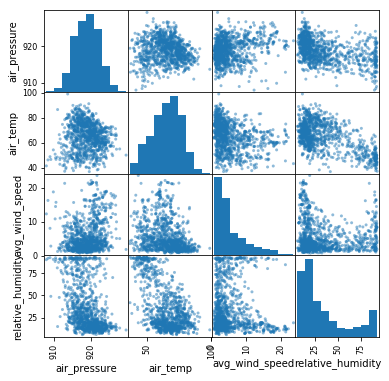

<Figure size 432x288 with 0 Axes>

[[178.56   0.    43.2 ]
 [  0.   178.56  48.24]
 [  0.     0.     1.  ]]
[[ 11.16   0.   232.92]
 [  0.   223.2   25.92]
 [  0.     0.     1.  ]]
[[178.56   0.   101.45]
 [  0.   178.56  33.02]
 [  0.     0.     1.  ]]
[[ 11.16   0.   291.17]
 [  0.   223.2   10.7 ]
 [  0.     0.     1.  ]]


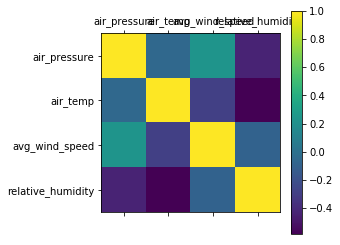

In [201]:
pd.scatter_matrix(fil4, figsize=(6, 6))
plt.figure()
plt.matshow(fil4.corr())
plt.xticks(range(len(fil4.columns)), fil4.columns)
plt.yticks(range(len(fil4.columns)), fil4.columns)
plt.colorbar()

In [229]:
#Rainfall
fil5 = pd.read_csv("C:/Users/Surabhi/Desktop/IIITD/7th SEM/DSc/Assignments/Assignment1/datafile_rainfall.csv")

[2890.  2745.3 2711.7 1112.  1124.4  892.7 2947.6  840.1  600.3  695.
 1568.6 1024.4  421.6 1182.2 1278.9 1165.8 2664.9 3443.4 1738.9  994.4
  755.6 2805.4  739.6 1344.5  497.5  834.5  652.1 1061.7 2684.9  973.
  815.7 1476.   803.   769.   408.3  585.2]
[[334.8    0.    54.  ]
 [  0.   217.44  36.  ]
 [  0.     0.     1.  ]]
[[1.92007661e-04 0.00000000e+00 1.30222047e-01]
 [0.00000000e+00 1.13636364e+00 5.00000000e-01]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[ 1.92007661e-04  0.00000000e+00  1.30222047e-01]
 [ 0.00000000e+00 -1.00000000e+00  5.00000000e-01]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
[[334.8    0.    54.  ]
 [  0.   217.44  36.  ]
 [  0.     0.     1.  ]]
[[ 7.83699060e-03  0.00000000e+00 -1.48526646e+01]
 [ 0.00000000e+00  1.45018330e-04  3.64199035e-02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[334.8    0.    54.  ]
 [  0.   217.44  36.  ]
 [  0.     0.     1.  ]]

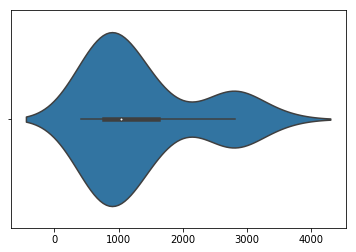

[[334.8    0.    54.  ]
 [  0.   217.44  36.  ]
 [  0.     0.     1.  ]]
[[334.8     0.     53.325]
 [  0.    217.44   38.2  ]
 [  0.      0.      1.   ]]


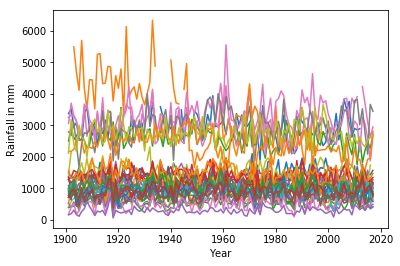

In [366]:
states = fil5["SUBDIVISION"].unique()
years = fil5["YEAR"].unique()
rainfall = fil5["ANNUAL"]
last = np.array(fil5.groupby("SUBDIVISION").last())
lastcol = last[:,13]
ax = sns.violinplot(x=lastcol)

df = fil5.groupby('SUBDIVISION')['ANNUAL'].apply(list)
plt.figure()
thresh = 500
plt.xlabel("Year")
plt.ylabel("Rainfall in mm")

for i in range(len(states)):
    #if((df[i][-1]) - (df[i][0]) > thresh):
    plt.plot(np.arange(1901,1901+len(df[i])), df[i], label=states[i]+"")
        
#plt.legend()

In [277]:
#Water level in wells
fil6 = pd.read_csv("C:/Users/Surabhi/Desktop/IIITD/7th SEM/DSc/Assignments/Assignment1/rs_session243_au950_1.1.csv")

Text(0,0.5,'Frequency')

[[334.8    0.    54.  ]
 [  0.   217.44  36.  ]
 [  0.     0.     1.  ]]
[[ 0.01180638  0.         -0.22609209]
 [ 0.          0.15873016 -0.        ]
 [ 0.          0.          1.        ]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[334.8    0.    54.  ]
 [  0.   217.44  36.  ]
 [  0.     0.     1.  ]]
[[334.8     0.     34.575]
 [  0.    217.44   38.2  ]
 [  0.      0.      1.   ]]


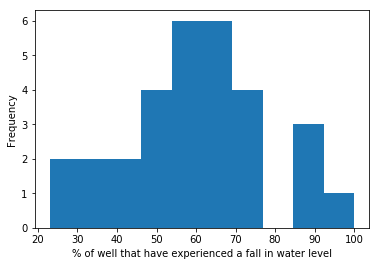

In [313]:
states = fil6["States/ UTs"]
fall = fil6["Fall - %"]
states = states[:-1]
fall = fall[:-1]
plt.hist(fall)
plt.xlabel("% of wells that have experienced a fall in water level")
plt.ylabel("Nuber of states")

[40.0, 10.0]


Text(0,0.5,'% of well that have experienced a fall in water level')

[[2.232e+03 0.000e+00 3.600e+02]
 [0.000e+00 5.436e+02 9.000e+01]
 [0.000e+00 0.000e+00 1.000e+00]]
[[ 0.03134796  0.          0.04545455]
 [ 0.          0.01180638 -0.22609209]
 [ 0.          0.          1.        ]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[2.232e+03 0.000e+00 3.600e+02]
 [0.000e+00 5.436e+02 9.000e+01]
 [0.000e+00 0.000e+00 1.000e+00]]
[[2.2320e+03 0.0000e+00 4.7075e+01]
 [0.0000e+00 5.4360e+02 3.8200e+01]
 [0.0000e+00 0.0000e+00 1.0000e+00]]


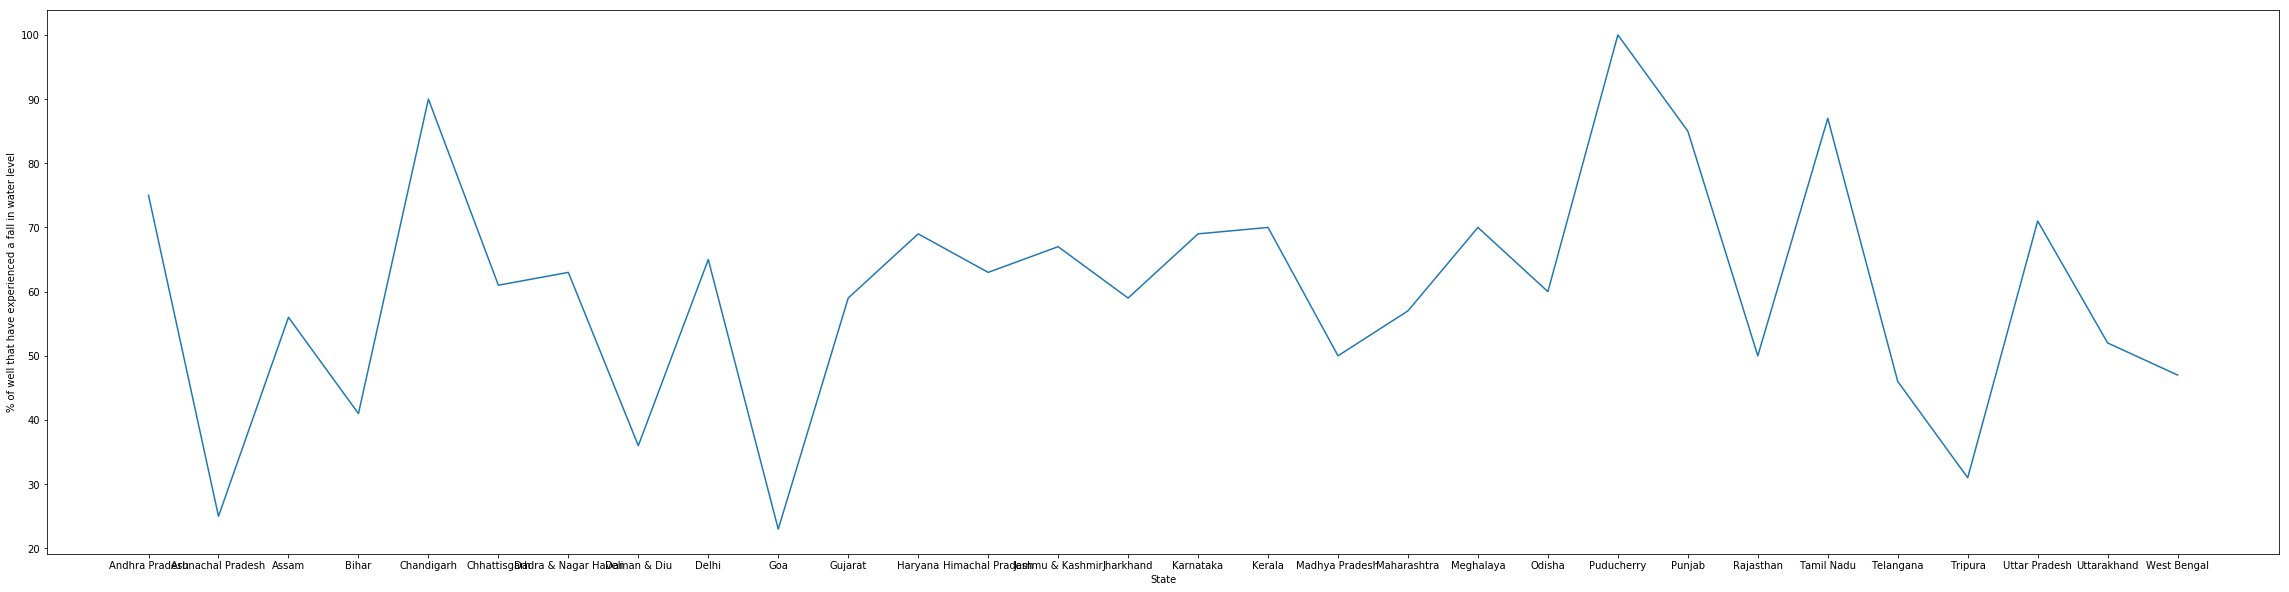

In [323]:
#Statewise information
fig_size = plt.rcParams["figure.figsize"]
print(fig_size)
fig_size[0] = 40
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.figure()
plt.plot(states, fall)
plt.xlabel("State")
plt.ylabel("% of well that have experienced a fall in water level")

[6.0, 4.0]
[[334.8    0.    54.  ]
 [  0.   217.44  36.  ]
 [  0.     0.     1.  ]]
[[ 3.03030303e-01  0.00000000e+00 -6.08742424e+02]
 [ 0.00000000e+00  1.19871162e-05 -1.20313547e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[334.8    0.    54.  ]
 [  0.   217.44  36.  ]
 [  0.     0.     1.  ]]
[[334.8    0.    65.95]
 [  0.   217.44  38.2 ]
 [  0.     0.     1.  ]]


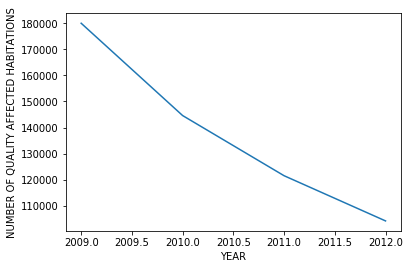

In [326]:
#Water Quality
fig_size[0] = 6
fig_size[1] = 4
plt.rcParams["figure.figsize"] = fig_size
fil7 = pd.read_csv("C:/Users/Surabhi/Desktop/IIITD/7th SEM/DSc/Assignments/Assignment1/QUALITY_AFFECTED_HABITATIONS.csv")
years = fil7["YEAR"]
habitations = fil7["QUALITY AFFECTED HABITATIONS"]
plt.plot(years, habitations)
plt.xlabel("YEAR")
plt.ylabel("NUMBER OF QUALITY AFFECTED HABITATIONS")
fig_size = plt.rcParams["figure.figsize"]
print(fig_size)


c:\users\surabhi\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  This is separate from the ipykernel package so we can avoid doing imports until


[[ 83.7    0.   137.7 ]
 [  0.    81.54 298.62]
 [  0.     0.     1.  ]]
[[ 1.  0. -0.]
 [ 0.  1. -0.]
 [ 0.  0.  1.]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[ 83.7    0.   221.4 ]
 [  0.    81.54 298.62]
 [  0.     0.     1.  ]]
[[ 1.  0. -0.]
 [ 0.  1. -0.]
 [ 0.  0.  1.]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[ 83.7    0.   305.1 ]
 [  0.    81.54 298.62]
 [  0.     0.     1.  ]]
[[ 1.  0. -0.]
 [ 0.  1. -0.]
 [ 0.  0.  1.]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[ 83.7    0.    54.  ]
 [  0.    81.54 217.08]
 [  0.     0.     1.  ]]
[[ 1.  0. -0.]
 [ 0.  1. -0.]
 [ 0.  0.  1.]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[ 83.7    0.   221.4 ]
 [  0.    81.54 217.08]
 [  0.     0.     1.  ]]
[[ 1.  0. -0.]
 [ 0.  1. -0.]
 [ 0.  0.  1.]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[ 83.7    0.   305.1 ]
 [  0.    81.54 217.08]
 [  0.     0.     1.  ]]
[[ 1.  0. -0.]
 [ 0.  1. -0.]
 [ 0.  0.  1.]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[ 83.7    0.    54.  ]
 [  0.    81.54 135.54]
 [  0.     0.   

[[ 83.7    0.    54.  ]
 [  0.    81.54 298.62]
 [  0.     0.     1.  ]]
[[ 7.93650794e-02  0.00000000e+00 -1.58706349e+02]
 [ 0.00000000e+00  4.76190476e-01 -0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[ 7.93650794e-02  0.00000000e+00 -1.58706349e+02]
 [ 0.00000000e+00  4.14078675e+00 -5.91480331e+01]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
[[ 7.93650794e-02  0.00000000e+00 -1.58706349e+02]
 [ 0.00000000e+00  4.10509031e-02 -1.51403941e+01]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
[[ 7.93650794e-02  0.00000000e+00 -1.58706349e+02]
 [ 0.00000000e+00  3.26605265e-04 -2.18077601e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
[[ 4.14078675e+00  0.00000000e+00 -5.91480331e+01]
 [ 0.00000000e+00  3.26605265e-04 -2.18077601e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
[[ 4.10509031e-02  0.00000000e+00 -1.51403941e+01]
 [ 0.00000000e+00  3.26605265e-04 -2.18077601e+00]
 [ 0.00000000e+00 

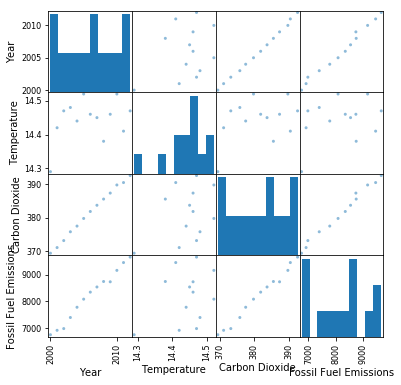

<Figure size 432x288 with 0 Axes>

[[178.56   0.    43.2 ]
 [  0.   178.56  48.24]
 [  0.     0.     1.  ]]
[[ 11.16   0.   232.92]
 [  0.   223.2   25.92]
 [  0.     0.     1.  ]]
[[178.56    0.    119.325]
 [  0.    178.56   33.02 ]
 [  0.      0.      1.   ]]
[[ 11.16    0.    309.045]
 [  0.    223.2    10.7  ]
 [  0.      0.      1.   ]]


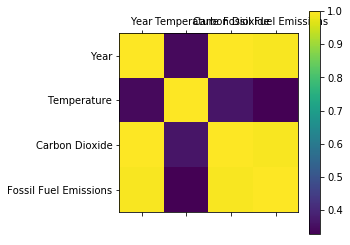

In [346]:
#AIR QUALITY
fil8 = pd.read_csv("C:/Users/Surabhi/Desktop/IIITD/7th SEM/DSc/Assignments/Assignment1/Table_33.10_SYB_2016.csv")
pd.scatter_matrix(fil8, figsize=(6, 6))
plt.figure()
plt.matshow(fil8.corr())
plt.xticks(range(len(fil8.columns)), fil8.columns)
plt.yticks(range(len(fil8.columns)), fil8.columns)
plt.colorbar()

## Global Scenario

In [405]:
fil9 = pd.read_csv("C:/Users/Surabhi/Desktop/IIITD/7th SEM/DSc/Assignments/Assignment1/GlobalLandTemperaturesByCountry.csv")

In [406]:
globaldata = fil9.groupby('Country')['AverageTemperature'].apply(list)
countries = fil9['Country'].unique()

Afghanistan
Africa
Albania
Algeria
American Samoa
Andorra
Angola
Anguilla
Antarctica
Antigua And Barbuda
Argentina
Armenia
Aruba
Asia
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Baker Island
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bhutan
Bolivia
Bonaire, Saint Eustatius And Saba
Bosnia And Herzegovina
Botswana
Brazil
British Virgin Islands
Bulgaria
Burkina Faso
Burma
Burundi
Côte D'Ivoire
Cambodia
Cameroon
Canada
Cape Verde
Cayman Islands
Central African Republic
Chad
Chile
China
Christmas Island
Colombia
Comoros
Congo (Democratic Republic Of The)
Congo
Costa Rica
Croatia
Cuba
Curaçao
Cyprus
Czech Republic
Denmark (Europe)
Denmark
Djibouti
Dominica
Dominican Republic
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Ethiopia
Europe
Falkland Islands (Islas Malvinas)
Faroe Islands
Federated States Of Micronesia
Fiji
Finland
France (Europe)
France
French Guiana
French Polynesia
French Southern And Antarctic Lands
Gabon
Gambia
Gaza Strip
Georgia
Germany
Ghana
Greece
Gre

[[334.8    0.    54.  ]
 [  0.   217.44  36.  ]
 [  0.     0.     1.  ]]
[[0.00849618 0.         0.04545455]
 [0.         0.01366869 0.54352794]
 [0.         0.         1.        ]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[334.8    0.    54.  ]
 [  0.   217.44  36.  ]
 [  0.     0.     1.  ]]
[[334.8    0.    49.2 ]
 [  0.   217.44  38.2 ]
 [  0.     0.     1.  ]]


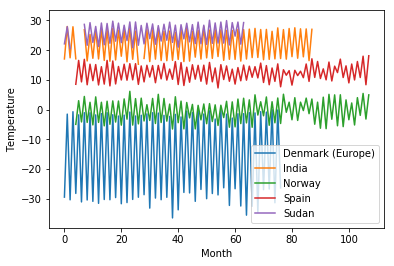

In [415]:
#global temperatures
for i in range(len(countries)):
    print(countries[i])
    if countries[i] in ["Spain", "India", "Denmark (Europe)", "Norway", "Sudan"]:
        plt.plot(globaldata[i][0::30], label=countries[i]+"")

plt.xlabel("Month")
plt.ylabel("Temperature")
plt.legend()

In [443]:
fil10 = pd.read_csv("C:/Users/Surabhi/Desktop/IIITD/7th SEM/DSc/Assignments/Assignment1/globalforest.csv")
fil11 = pd.read_csv("C:/Users/Surabhi/Desktop/IIITD/7th SEM/DSc/Assignments/Assignment1/globalCO2.csv")

Text(0.5,0,'Year')

[[334.8    0.    54.  ]
 [  0.   217.44  36.  ]
 [  0.     0.     1.  ]]
[[ 3.49650350e-02  0.00000000e+00 -6.95349650e+01]
 [ 0.00000000e+00  6.86391782e-07 -2.73815571e+01]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[334.8    0.    54.  ]
 [  0.   217.44  36.  ]
 [  0.     0.     1.  ]]
[[334.8    0.    50.45]
 [  0.   217.44  38.2 ]
 [  0.     0.     1.  ]]


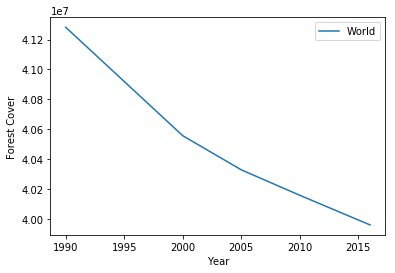

In [442]:
#Global forest cover
globalforest = np.array(fil10)
year1 = globalforest[:,1]
year2 = globalforest[:,-1]
change = year1-year2

plt.figure()
storeind = change.argsort()[-10:][::-1]

plt.plot(np.arange(1990, 1990+len(globalforest[np.argmax(year1-year2)][1:])), globalforest[np.argmax(year1-year2)][1:], label=globalforest[np.argmax(year1-year2)][0]+"")
plt.legend()
plt.ylabel("Forest Cover")
plt.xlabel("Year")